In [37]:
import torch
import torchmetrics
import os
import pickle
from torchmetrics.detection.mean_ap import MeanAveragePrecision


label = 2



# Define the path to the IMPORTANT directory
important_dir = os.path.join(os.getcwd(), 'IMPORTANT_CAR')
important_dir1 = os.path.join(os.getcwd(), 'IMPORTANT1')
env_folders = ['0base', '1high', '2far', '3orange', '4shadow']
results_file = 'det_results.pkl'
env_accuracies = {}


def convert(results):
    for result in results:
        idx = (result[0]['labels'] == label).nonzero(as_tuple=True)[0]
        if idx.nelement() != 0:
            # result[0]['labels'] = torch.tensor([result[0]['labels'][idx]])
            result[0]['labels'] = torch.tensor([47])
            result[0]['boxes'] = result[0]['boxes'][idx]
            # print(result[0]['labels'])
    return results


low = ['0base', '3orange','4shadow']
results_path = os.path.join('GT', 'gt', '0base', results_file)
with open(results_path, 'rb') as f:
    results_base = pickle.load(f)
    results_base = convert(results_base)
    
    
high = ['1high']
results_path = os.path.join('GT', 'gt', '1high', results_file)
with open(results_path, 'rb') as f:
    results_high = pickle.load(f)
    results_high = convert(results_high)
    
far = ['2far']
results_path = os.path.join('GT', 'gt', '2far', results_file)
with open(results_path, 'rb') as f:
    results_far = pickle.load(f)
    results_far = convert(results_far)

subdirs = next(os.walk('IMPORTANT1'))[1]
# subdirs = ['15texmore_car_frcnn']
for exp in subdirs:
    
    # exp = '3gausspatch_car_yolof'
    print(exp)
    metric = MeanAveragePrecision(iou_thresholds=[0.01], class_metrics =True)
    metric_per = MeanAveragePrecision(iou_thresholds=[0.01], class_metrics =True)
    for env in env_folders:
        
        metric_per.reset()
        # Define the path to the det_results.pkl file for this environment
        results_path = os.path.join(important_dir1, exp, env, results_file)
        if env in low:
            target = results_base
        if env in high:
            target = results_high
        if env in far:
            target = results_far
        # Load the det_results.pkl file
        with open(results_path, 'rb') as f:
            results = pickle.load(f)
        # print(results)
        for i in range(len(target)):
            # print(results[i][0]['labels'],target[i][0]['labels'])
            metric.update(results[i],target[i])
            metric_per.update(results[i],target[i])
            # print(i)
        AP_per = metric_per.compute()
        print('{:.4f}'.format(AP_per['map'].item()))
        
    AP = metric.compute()
    print('{:.4f} \n'.format(AP['map'].item()))
    # print(AP['map_per_class'])
# for key, value in env_accuracies.items():
#     _av_acc += value
# total_acc = _av_acc/5
# # Print the accuracies for each environment
# print(env_accuracies)
# print(total_acc)

1appleours_apple_yolo
0.6634
0.8317
0.3366
0.1683
0.0891
0.4158 

1cupours_cup_frcnn
0.0000
0.0000
0.0000
0.0000
0.0000
0.0000 

1cupours_cup_yolo
0.0000
0.0000
0.0000
0.0000
0.0000
0.0000 

1cup2d_cup_frcnn
0.0000
0.0000
0.0000
0.0000
0.0000
0.0000 

1applegauss_apple_yolo
1.0000
1.0000
0.8317
0.7525
0.0891
0.7327 

1cuptex_cup_frcnn
0.0000
0.0000
0.0000
0.0000
0.0000
0.0000 

1cupgauss_cup_frcnn
0.0000
0.0000
0.0000
0.0000
0.0000
0.0000 

1cupgauss_cup_yolo
0.0000
0.0000
0.0000
0.0000
0.0000
0.0000 

1appletex_apple_yolo
1.0000
1.0000
0.2574
0.7525
0.5050
0.7030 

1appleours_apple_frcnn
0.0000
0.9109
0.1683
0.0891
0.0000
0.2376 

1cuptex_cup_yolo
0.0000
0.0000
0.0000
0.0000
0.0000
0.0000 

1appletex_apple_frcnn
0.0891
1.0000
0.8317
0.0891
0.0891
0.4158 

1apple2d_apple_frcnn
0.8317
1.0000
0.7525
0.7525
0.0891
0.6832 

1cup2d_cup_yolo
0.0000
0.0000
0.0000
0.0000
0.0000
0.0000 

1apple2d_apple_yolo
1.0000
1.0000
0.5842
0.7525
0.1683
0.7030 

1applegauss_apple_frcnn
1.0000
1.0000
0.8317

In [2]:
import torch
import torchmetrics
import os
import pickle
from torchmetrics.detection.mean_ap import MeanAveragePrecision


label = 2



# Define the path to the IMPORTANT directory
important_dir = os.path.join(os.getcwd(), 'IMPORTANT')
important_dir1 = os.path.join(os.getcwd(), 'IMPORTANT1')
env_folders = ['0base', '1high', '2far', '3orange', '4shadow']
results_file = 'det_results.pkl'



subdirs = next(os.walk('IMPORTANT1'))[1]
for exp in subdirs:
    count=0
    total=0
    if 'cup' in exp:
        label = 41
    elif 'car' in exp:
        label = 2
    elif 'apple' in exp:
        label = 47
    print(exp)
    for env in env_folders:
        count_per=0
        # Define the path to the det_results.pkl file for this environment
        results_path = os.path.join(important_dir1, exp, env, results_file)
        with open(results_path, 'rb') as f:
            results = pickle.load(f)
        # print(results)
        for i in range(len(results)):
            # print(results[i][0]['labels'])
            if label in results[i][0]['labels']:
                count+=1
                count_per+=1
            total+=1
        print('{:.4}'.format(count_per/(i+1)))
    print('{:.4f} \n'.format(count/total))
# for key, value in env_accuracies.items():
#     _av_acc += value
# total_acc = _av_acc/5
# # Print the accuracies for each environment
# print(env_accuracies)
# print(total_acc)

15caroursview_car_frcnn
0.08333
0.0
0.3333
0.0
0.1667
0.1167 

15tex_car_frcnn
0.08333
0.0
0.9167
0.08333
0.5833
0.3333 

1appleours_apple_yolo
0.6667
0.8333
0.3333
0.1667
0.08333
0.4167 

1cupours_cup_frcnn
0.5
0.75
0.0
0.4167
0.25
0.3833 

15texmore_car_yolo
0.08333
0.5833
0.8333
0.0
0.0
0.3000 

1cupours_cup_yolo
0.08333
0.3333
0.9167
0.0
0.08333
0.2833 

1cup2d_cup_frcnn
0.75
1.0
0.9167
0.9167
0.75
0.8667 

1applegauss_apple_yolo
1.0
1.0
0.8333
0.75
0.08333
0.7333 

1cuptex_cup_frcnn
0.4167
0.75
0.3333
0.3333
0.3333
0.4333 

1cupgauss_cup_frcnn
1.0
1.0
1.0
1.0
0.4167
0.8833 

1cupgauss_cup_yolo
1.0
1.0
1.0
0.75
0.5
0.8500 

1appletex_apple_yolo
1.0
1.0
0.25
0.75
0.5
0.7000 

1appleours_apple_frcnn
0.0
0.9167
0.1667
0.08333
0.0
0.2333 

15texmore_car_frcnn
0.08333
0.0
0.9167
0.08333
0.5
0.3167 

1cuptex_cup_yolo
0.1667
0.4167
0.5833
0.08333
0.3333
0.3167 

1appletex_apple_frcnn
0.08333
1.0
0.8333
0.08333
0.08333
0.4167 

1apple2d_apple_frcnn
0.8333
1.0
0.75
0.75
0.08333
0.6833 

15c

# DETECTION INFERENCE

[0.88202864 0.88202864 0.88202864 0.88202864]


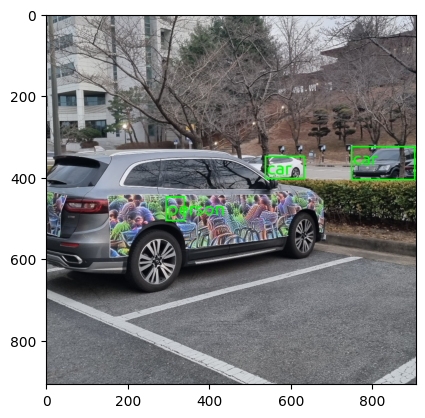

In [24]:
import cv2
import torchvision.transforms as T
from nvdiffrec.atk.utils_initiate import initiate_model, Label2Word
import numpy as np
from torchvision.utils import draw_bounding_boxes
import torch
import matplotlib.pyplot as plt
import imageio

class Argument:
    def __init__(self, value):
        self.value = value

def scalef(ori_image, args):
    X = args.cfg['img_scale'][0]
    h,w,c = ori_image.shape[-3:]
    # Compute the new size of the image while maintaining its aspect ratio
    aspect_ratio = w / h
    new_h = int(X / aspect_ratio)
    new_w = int(X * aspect_ratio)
    size = (new_w, new_h)

    # Resize the image using PyTorch's resize function and compute the scale factor
    
    
    scale_factor = np.array([new_w / w, new_h / h, new_w / w, new_h / h], dtype=np.float32)
    
    # scale_factor = torch.tensor([new_w / w, new_h / h, new_w / w, new_h / h])
    # scale_factor = scale_factor.cuda() if args.model_name == 'frcnn' else scale_factor
    return scale_factor
def process_det_output(output):
    #'output:List[List(80)[Tensor(n,5)]]'
    # only batch size 1
    
    bbox_result = output[0]
    if len(bbox_result) < 80:
        bbox_result=bbox_result[0]
    labels = [
            np.full(bbox.shape[0], i, dtype=np.int32)
            for i, bbox in enumerate(bbox_result)
        ]
    labels = np.concatenate(labels)
    bboxes = np.vstack(bbox_result)    
    scores = bboxes[...,-1]
    bboxes = bboxes[...,:-1]
    idx = scores>0.5
    
    all_preds = {'boxes': bboxes, 'labels': labels, 'scores': scores}

    bboxes = torch.tensor(bboxes[idx, :])
    labels = torch.tensor(labels[idx])
    scores = torch.tensor(scores[idx])
    return [{'boxes': bboxes, 'labels': labels, 'scores': scores, 'all_preds':all_preds}]

count=0
# Loop over the frames of the video
count+=1


# Read the next frame from the video
# ret, img = cap.read()
original_label = ''
label_names = Label2Word('yolof')

font = 'Ubuntu-R.ttf'

args = Argument(0)
args.model_name = 'yolof'
 
model = initiate_model(args)
    # if args.model_name == 'crcnn' or 'yolof':
    #     model.to('cuda:1')
transform = T.Compose([
    T.ToTensor(),
    T.Resize(args.cfg['img_scale']),
    T.Normalize(args.cfg['img_norm_cfg']['mean'], args.cfg['img_norm_cfg']['std']),
])

net = model
img = cv2.imread("testimgs/KakaoTalk_20230308_193201093_05.jpg")

image = img
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
h,w,c = image.shape
size = min(h, w)
image = cv2.getRectSubPix(image, (size, size), (w // 2, h // 2))
image_t = transform(image).cuda()[None,...]


scale_factor = scalef(image,args)
print(scale_factor)
imsize = np.array((h,w,3))
img_metas = {'ori_shape': image.shape,
        'img_shape': imsize,
        'pad_shape': imsize,
        'img_norm_cfg': args.cfg['img_norm_cfg'],
        'scale_factor': scale_factor,
        }


with torch.no_grad():
    detections = net.forward_test([image_t],[[img_metas]],rescale=True)
detections = process_det_output(detections)
# print(detections)

image = torch.from_numpy(image).permute(2,0,1)
# detections[0]['labels'] +=1
labels = [str(label_names.id_to_label(i)) for i in detections[0]['labels']]


det = {'labels':[], 'boxes':[], 'scores':[]}
if not original_label == "":
    try:
        obj_idx = labels.index(original_label)
        l = ['{} {}'.format(labels[obj_idx], int(round(detections[0]["scores"][obj_idx].item(),2)*100))]
        b = detections[0]['boxes'][obj_idx][None,...]
        det['labels']=[detections[0]['labels'][obj_idx].item()]
        det['boxes']=b
        det['scores'] = [detections[0]['scores'][obj_idx].item()]
    except ValueError:
        l = torch.tensor([])
        b = torch.tensor([])
else:
    l = labels
    b = detections[0]['boxes']
    
c,h,w = image.shape
color = (255,0,0) if original_label in labels else (0,255,0)

font_size = int(w/20)
box = draw_bounding_boxes(image, b ,l, colors = color,font=font, font_size=font_size, width=4).permute(1,2,0)
type(box)

plt.imshow(box)
imageio.imsave('figure.jpg', box)
plt.show()
# cap.release()
# cv2.destroyAllWindows()

In [ ]:
import cv2
import torchvision.transforms as T
from nvdiffrec.atk.utils_initiate import initiate_model, Label2Word
import numpy as np
from torchvision.utils import draw_bounding_boxes
import torch
import matplotlib.pyplot as plt
import imageio

class Argument:
    def __init__(self, value):
        self.value = value

def scalef(ori_image, args):
    X = args.cfg['img_scale'][0]
    h,w,c = ori_image.shape[-3:]
    # Compute the new size of the image while maintaining its aspect ratio
    aspect_ratio = w / h
    new_h = int(X / aspect_ratio)
    new_w = int(X * aspect_ratio)
    size = (new_w, new_h)

    # Resize the image using PyTorch's resize function and compute the scale factor
    
    
    scale_factor = np.array([new_w / w, new_h / h, new_w / w, new_h / h], dtype=np.float32)
    
    # scale_factor = torch.tensor([new_w / w, new_h / h, new_w / w, new_h / h])
    # scale_factor = scale_factor.cuda() if args.model_name == 'frcnn' else scale_factor
    return scale_factor
def process_det_output(output):
    #'output:List[List(80)[Tensor(n,5)]]'
    # only batch size 1
    
    bbox_result = output[0]
    if len(bbox_result) < 80:
        bbox_result=bbox_result[0]
    labels = [
            np.full(bbox.shape[0], i, dtype=np.int32)
            for i, bbox in enumerate(bbox_result)
        ]
    labels = np.concatenate(labels)
    bboxes = np.vstack(bbox_result)    
    scores = bboxes[...,-1]
    bboxes = bboxes[...,:-1]
    idx = scores>0.5
    
    all_preds = {'boxes': bboxes, 'labels': labels, 'scores': scores}

    bboxes = torch.tensor(bboxes[idx, :])
    labels = torch.tensor(labels[idx])
    scores = torch.tensor(scores[idx])
    return [{'boxes': bboxes, 'labels': labels, 'scores': scores, 'all_preds':all_preds}]

count=0
# Loop over the frames of the video
count+=1


# Read the next frame from the video
# ret, img = cap.read()
original_label = ''
label_names = Label2Word('yolof')

font = 'Ubuntu-R.ttf'

args = Argument(0)
args.model_name = 'yolof'
 
model = initiate_model(args)
    # if args.model_name == 'crcnn' or 'yolof':
    #     model.to('cuda:1')
transform = T.Compose([
    T.ToTensor(),
    T.Resize(args.cfg['img_scale']),
    T.Normalize(args.cfg['img_norm_cfg']['mean'], args.cfg['img_norm_cfg']['std']),
])

net = model
img = cv2.imread("testimgs/KakaoTalk_20230308_193201093_05.jpg")

image = img
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
h,w,c = image.shape
size = min(h, w)
image = cv2.getRectSubPix(image, (size, size), (w // 2, h // 2))
image_t = transform(image).cuda()[None,...]


scale_factor = scalef(image,args)
print(scale_factor)
imsize = np.array((h,w,3))
img_metas = {'ori_shape': image.shape,
        'img_shape': imsize,
        'pad_shape': imsize,
        'img_norm_cfg': args.cfg['img_norm_cfg'],
        'scale_factor': scale_factor,
        }


with torch.no_grad():
    detections = net.forward_test([image_t],[[img_metas]],rescale=True)
detections = process_det_output(detections)
# print(detections)

image = torch.from_numpy(image).permute(2,0,1)
# detections[0]['labels'] +=1
labels = [str(label_names.id_to_label(i)) for i in detections[0]['labels']]


det = {'labels':[], 'boxes':[], 'scores':[]}
if not original_label == "":
    try:
        obj_idx = labels.index(original_label)
        l = ['{} {}'.format(labels[obj_idx], int(round(detections[0]["scores"][obj_idx].item(),2)*100))]
        b = detections[0]['boxes'][obj_idx][None,...]
        det['labels']=[detections[0]['labels'][obj_idx].item()]
        det['boxes']=b
        det['scores'] = [detections[0]['scores'][obj_idx].item()]
    except ValueError:
        l = torch.tensor([])
        b = torch.tensor([])
else:
    l = labels
    b = detections[0]['boxes']
    
c,h,w = image.shape
color = (255,0,0) if original_label in labels else (0,255,0)

font_size = int(w/20)
box = draw_bounding_boxes(image, b ,l, colors = color,font=font, font_size=font_size, width=4).permute(1,2,0)
type(box)

plt.imshow(box)
imageio.imsave('figure.jpg', box)
plt.show()
# cap.release()
# cv2.destroyAllWindows()